In [1]:
import sys
import os
# sys.path.append('/home/beinhaud/diplomka/mcs-source/evaluation_tools')
sys.path.append('/home/david/source/diplomka/evaluation_tools')
sys.path.append('/home/david/source/diplomka/results_analysis_tools')
from typing import List, Dict, Any, Tuple, Union

from evaluation_tools.plugins.predictions_analyzer import PredictionsAnalyzer
from evaluation_tools.plugins.wandb_processor import WandbProcessor
from evaluation_tools.fields.experiment_parameters_fields import WandbExperimentVariants, GridSearchRunVariants, ModelEvaluationRunVariant, AdditionalExperiments
from evaluation_tools.fields.prediction_analysis_fields import (
    BatchSummaryFields,
    EvaluationPairsVariants,
)
from evaluation_tools.fields.dataset_analyzer_fields import AnalysisFields, DatasetVariantField
from evaluation_tools.fields.evaluation_processor_fields import EvaluationProcessorChoices
from nn_model.type_variants import EvaluationFields
import nn_model.globals

import pandas as pd
import numpy as np

from results_analysis_tools.result_analyzer import ResultAnalyzer
from evaluation_tools.fields.dataset_parameters import ALL_TIME_STEP_VARIANTS
from results_analysis_tools.fields.experiment_analyses import (
    PlottingVariants,
    PluginVariants,
)
from results_analysis_tools.results_plotter import ResultsPlotter
from results_analysis_tools.plugins.dataset_results_processor import DatasetResultsProcessor

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

from evaluation_tools.fields.dataset_analyzer_fields import StatisticsFields
from results_analysis_tools.plugins.histogram_processor import DatasetHistogramProcessor
from results_analysis_tools.plugins.temporal_evolution_processor import TemporalEvolutionProcessor
from results_analysis_tools.plugins.synchrony_experiments_processor import SynchronyExperimentsProcessor
from results_analysis_tools.plugins.evaluation_results_processor import EvaluationResultsProcessor
from results_analysis_tools.plugins.wandb_summary_processor import WandbSummaryProcessor
from results_analysis_tools.plugins.batch_prediction_analysis_processor import BatchPredictionAnalysisProcessor

from nn_model.globals import MODEL_SIZES


In [2]:
PLOTING_DESTINATION = "/home/david/source/diplomka/thesis_plots/"
EVALUATION_RESULTS_BASE = "/analysis_results"
analysis_paths = {
    EvaluationProcessorChoices.FULL_DATASET_ANALYSIS: f"{nn_model.globals.PROJECT_ROOT}{EVALUATION_RESULTS_BASE}/{EvaluationProcessorChoices.FULL_DATASET_ANALYSIS.value}/",
    EvaluationProcessorChoices.SUBSET_DATASET_ANALYSIS: f"{nn_model.globals.PROJECT_ROOT}{EVALUATION_RESULTS_BASE}/{EvaluationProcessorChoices.SUBSET_DATASET_ANALYSIS.value}/",
    EvaluationProcessorChoices.WANDB_ANALYSIS: f"{nn_model.globals.PROJECT_ROOT}{EVALUATION_RESULTS_BASE}/{EvaluationProcessorChoices.WANDB_ANALYSIS.value}/results.pkl",
    EvaluationProcessorChoices.PREDICTION_ANALYSIS: f"{nn_model.globals.PROJECT_ROOT}{EVALUATION_RESULTS_BASE}/{EvaluationProcessorChoices.PREDICTION_ANALYSIS.value}/",
}
result_analyzer = ResultAnalyzer(analysis_paths)
all_results = result_analyzer.get_all_results
all_results.keys()


dict_keys([<EvaluationProcessorChoices.FULL_DATASET_ANALYSIS: 'full_dataset'>, <EvaluationProcessorChoices.SUBSET_DATASET_ANALYSIS: 'subset_dataset'>, <EvaluationProcessorChoices.WANDB_ANALYSIS: 'wandb_analysis'>, <EvaluationProcessorChoices.PREDICTION_ANALYSIS: 'prediction_analysis'>])

# Full Dataset Analysis

## Time Bin Spike Counts
This part of code shows how to plot the distribution of spike counts across all time bins and how to write the exact ratios.

In [3]:
result_analyzer.get_mean_spike_counts(False,).head(5)

time_step  spike_count_bin  normalized_density
0          1                0              0.9944
1          1                1              0.0056
2          1                2              0.0000
3          1                3              0.0000
4          1                4              0.0000

In [4]:
result_analyzer.get_mean_spike_counts(True).head(5)

time_step  spike_count_bin  normalized_density
0          1                0              0.9944
1          1                1              0.0056
2          1                2              0.0000
3          1                3              0.0000
4          1                4              0.0000

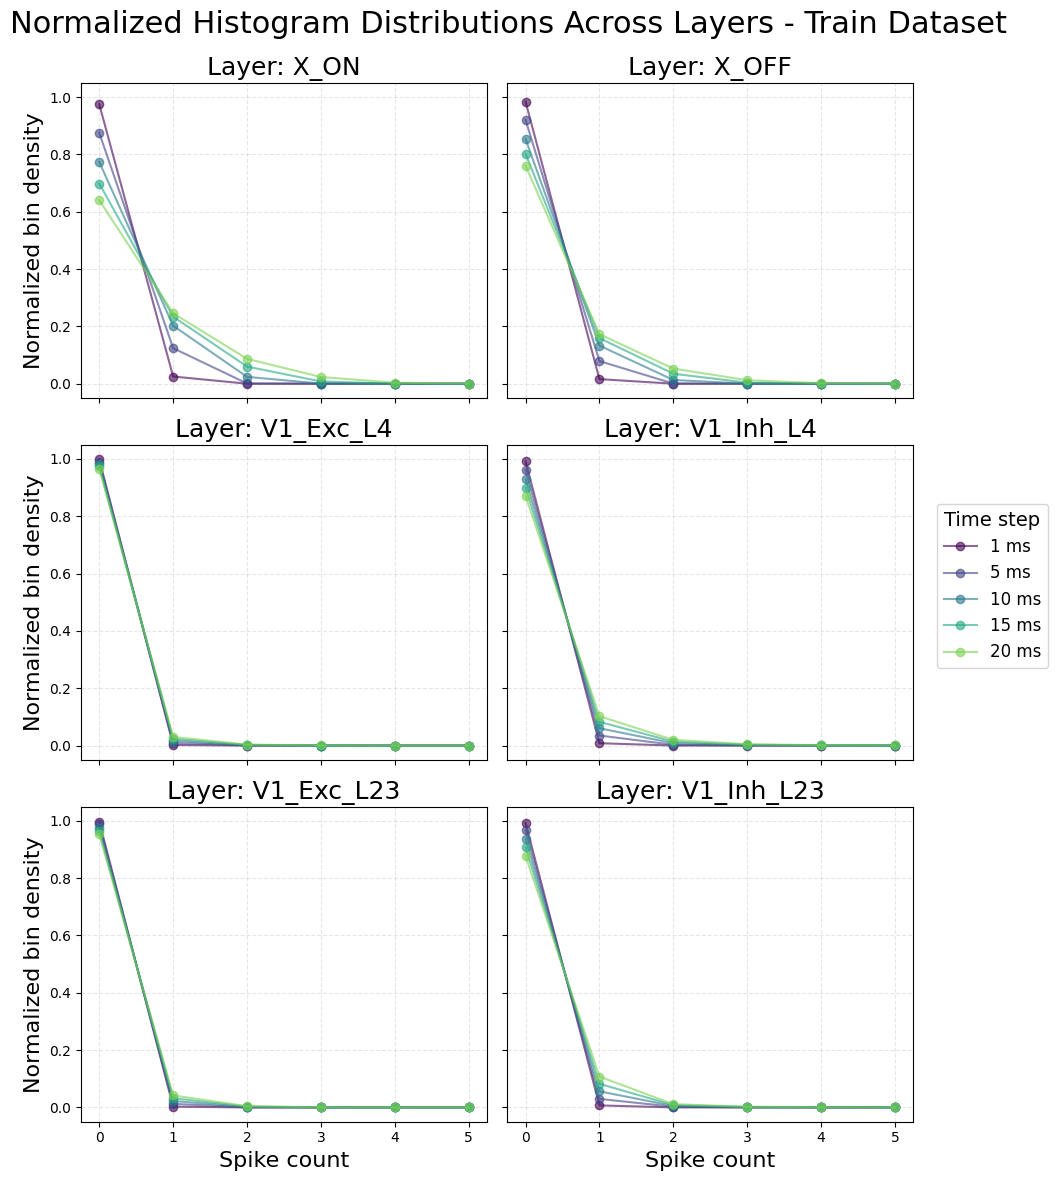

In [5]:
is_test = False
kwargs = {"is_test": is_test}
filename = f"time_step_counts_{"test" if is_test else "train"}.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_TIME_BIN_COUNT_RATIO, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.FULL_TIME_BIN_COUNT_RATIO, save_fig=destination, kwargs=kwargs)

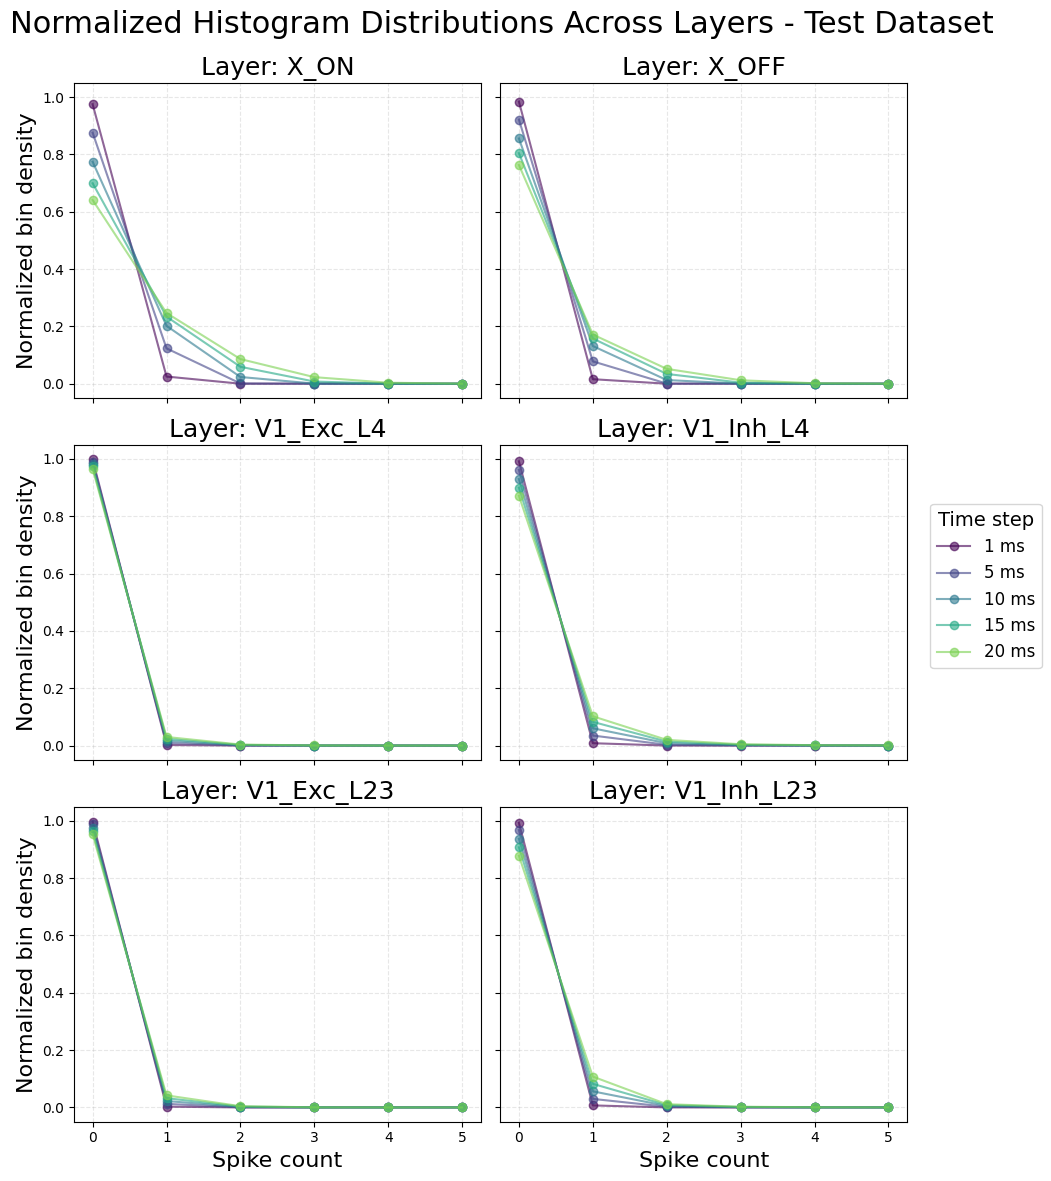

In [6]:
is_test = True
kwargs = {"is_test": is_test}
filename = f"time_step_counts_{"test" if is_test else "train"}.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_TIME_BIN_COUNT_RATIO, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.FULL_TIME_BIN_COUNT_RATIO, save_fig=destination, kwargs=kwargs)

## Temporal Distribution of Spikes

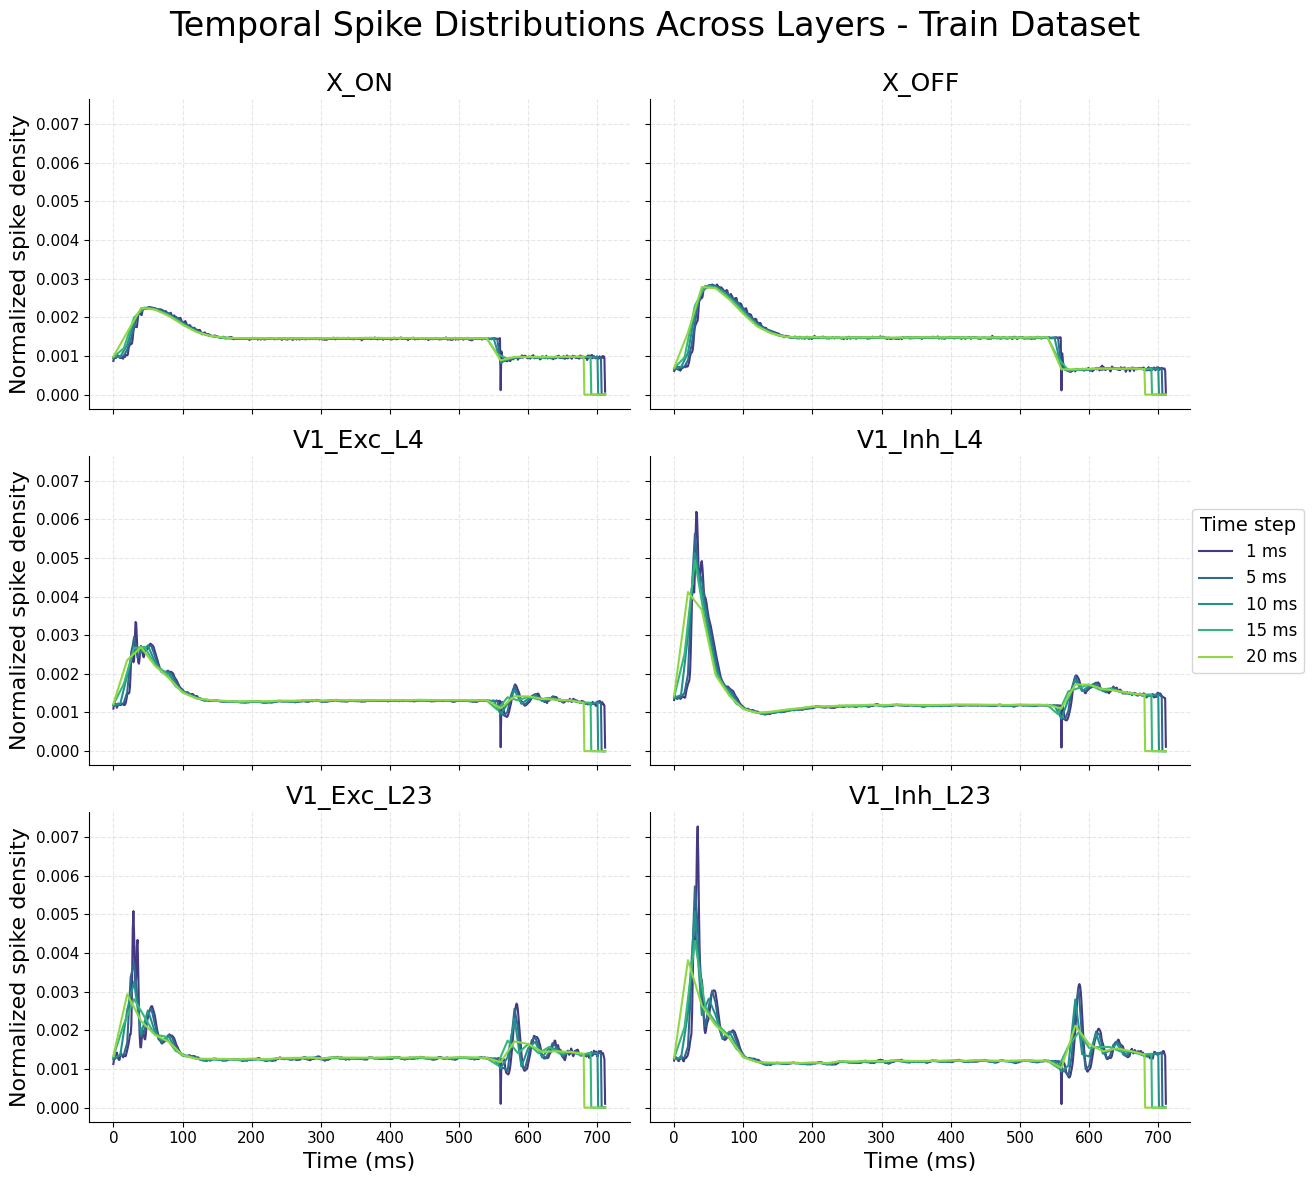

In [7]:
is_test = False
kwargs = {"is_test": is_test}
filename = f"temporal_spike_distribution_{"test" if is_test else "train"}.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_TEMPORAL_SPIKE_DISTRIBUTION, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.FULL_TEMPORAL_SPIKE_DISTRIBUTION, save_fig=destination, kwargs=kwargs)

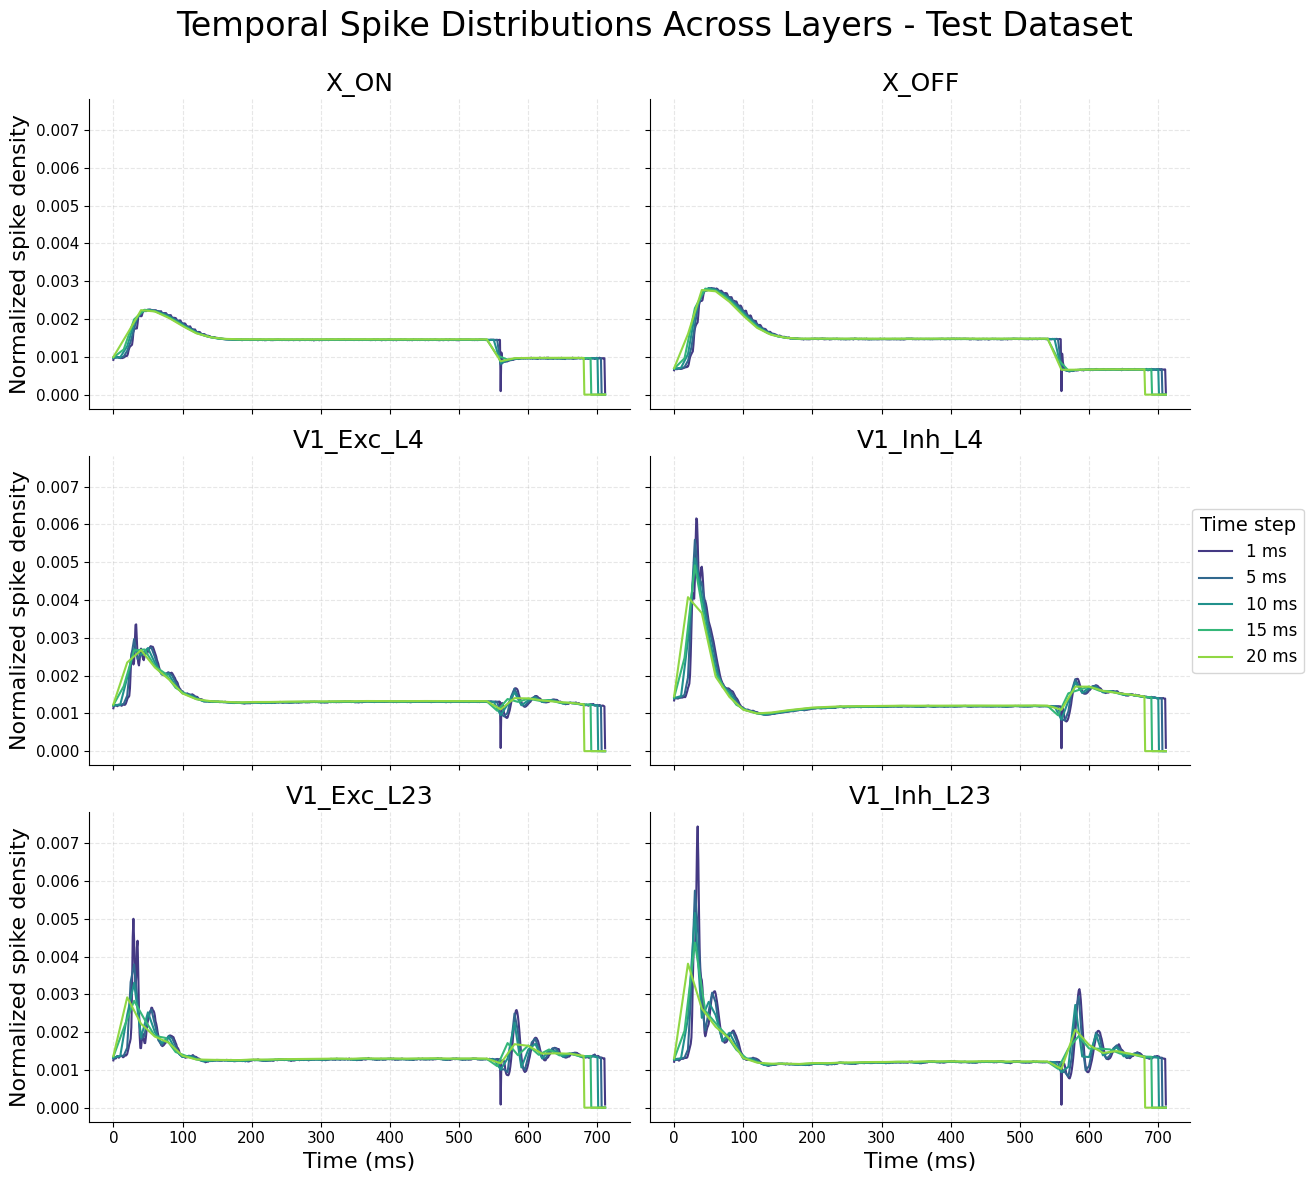

In [8]:
is_test = True
kwargs = {"is_test": is_test}
filename = f"temporal_spike_distribution_{"test" if is_test else "train"}.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_TEMPORAL_SPIKE_DISTRIBUTION, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.FULL_TEMPORAL_SPIKE_DISTRIBUTION, save_fig=destination, kwargs=kwargs)

/home/david/source/diplomka/results_analysis_tools/plotting/temporal_spike_distribution.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


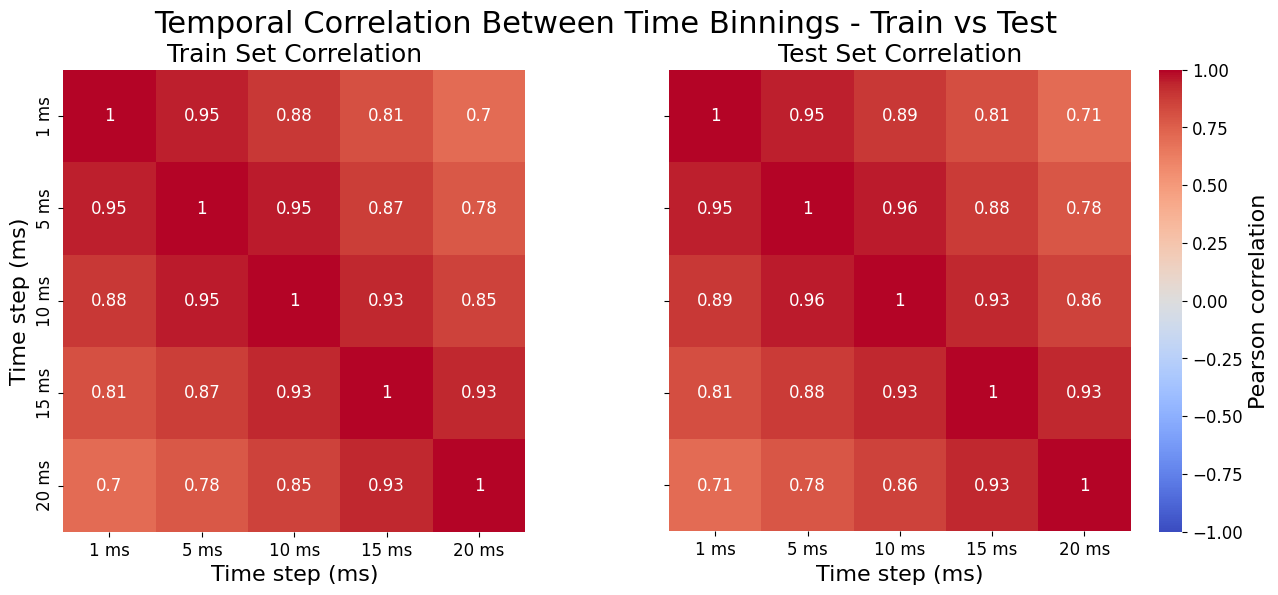

In [9]:
filename = "temporal_correlation_time_bin_size.pdf"
kwargs = {"is_test": is_test}
destination = f"{PLOTING_DESTINATION}{filename}"
train_corr = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_CORRELATION_MATRIX_BIN_SIZE_TEMPORAL_DATASET, is_test=False)
test_corr = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_CORRELATION_MATRIX_BIN_SIZE_TEMPORAL_DATASET, is_test=True)
ResultsPlotter.plot((train_corr, test_corr), PlottingVariants.FULL_CORRELATION_MATRIX_BIN_SIZE_TEMPORAL_DATASET, save_fig=destination, kwargs=kwargs)

## Temporal Spiking Activity

Plotting of the temporal spiking activity boxplot across different time bin sizes.

Index(['time_step', 'layer', 'statistics_type', 'values'], dtype='object')


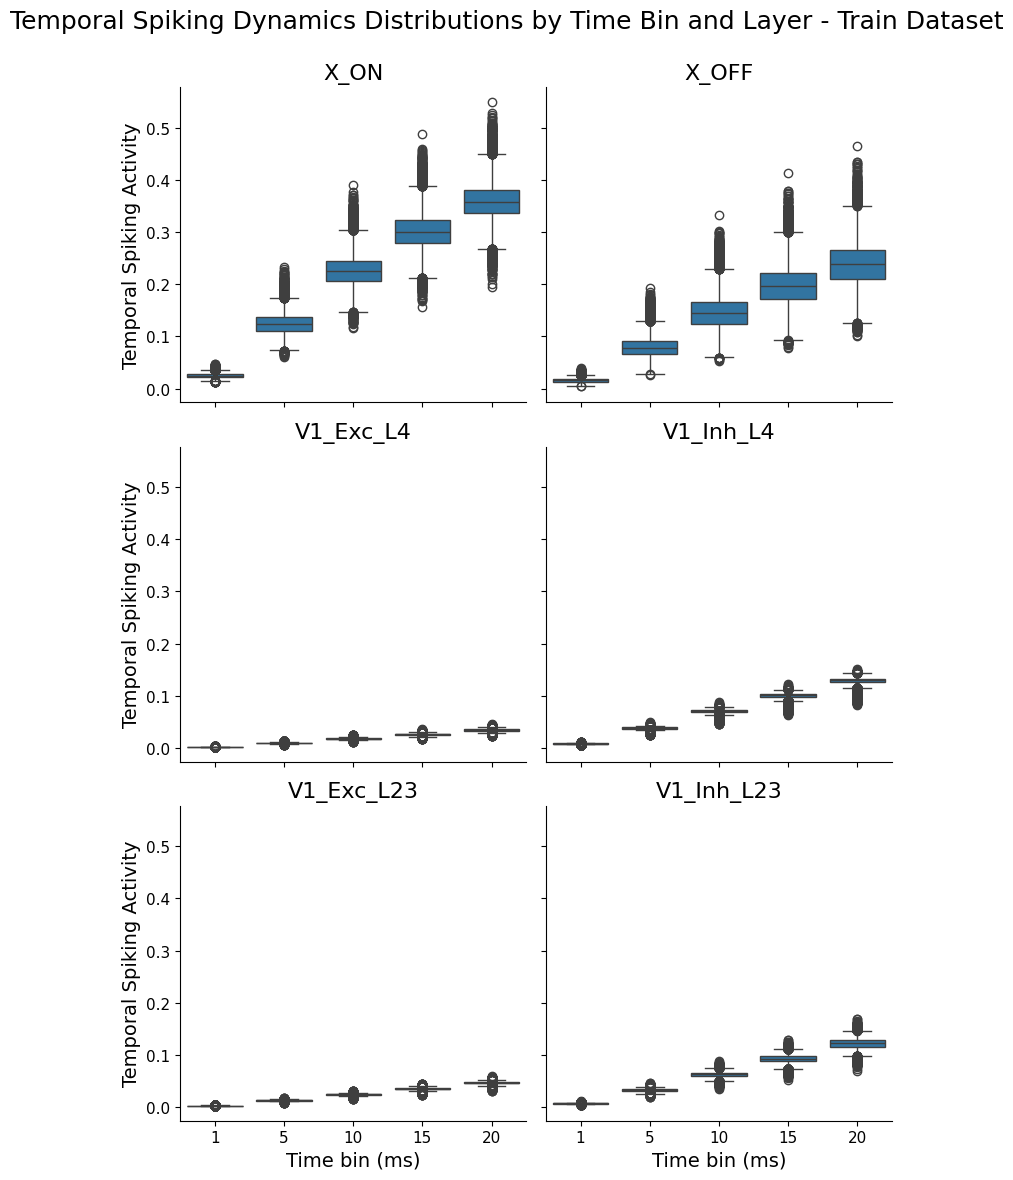

In [10]:
is_test = False
kwargs = {"is_test": is_test}
filename = f"synchrony_boxplot_time_bins_{"test" if is_test else "train"}.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_SYNCHRONY_TIME_BINS, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.FULL_SYNCHRONY_TIME_BINS, save_fig=destination, kwargs=kwargs)

Index(['time_step', 'layer', 'statistics_type', 'values'], dtype='object')


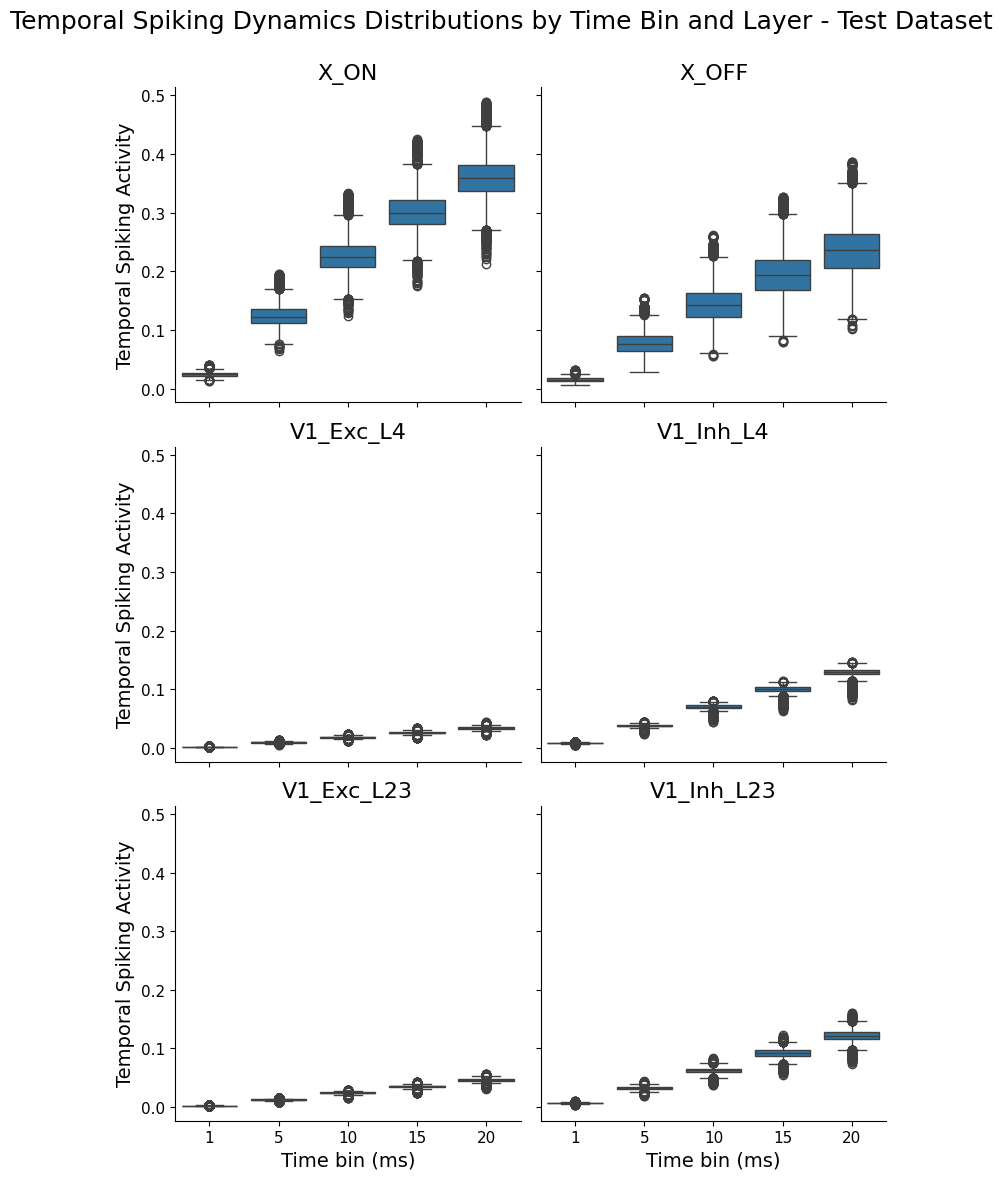

In [34]:
is_test = True
kwargs = {"is_test": is_test}
filename = f"synchrony_boxplot_time_bins_{"test" if is_test else "train"}.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.FULL_SYNCHRONY_TIME_BINS, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.FULL_SYNCHRONY_TIME_BINS, save_fig=destination, kwargs=kwargs)

In [12]:
result_analyzer.get_synchrony_summary(is_test=False, return_latex=False)

Index(['time_step', 'layer', 'statistics_type', 'values'], dtype='object')


time_step    mean  variance
0          1  0.0101    0.0001
1          5  0.0494    0.0018
2         10  0.0912    0.0057
3         15  0.1256    0.0098
4         20  0.1551    0.0134

In [13]:
result_analyzer.get_synchrony_summary(is_test=True, return_latex=False)

Index(['time_step', 'layer', 'statistics_type', 'values'], dtype='object')


time_step    mean  variance
0          1  0.0101    0.0001
1          5  0.0491    0.0017
2         10  0.0908    0.0057
3         15  0.1250    0.0097
4         20  0.1545    0.0133

# Subset Dataset Analysis


## Time Bin Spike Counts

In [14]:
is_test=False
result_analyzer.get_mean_spike_counts(is_test, process_subset=True)

spike_count_bin  full_density  subset_mean  subset_std
0                0        0.9105       0.9102      0.0004
1                1        0.0710       0.0712      0.0003
2                2        0.0147       0.0148      0.0001
3                3        0.0032       0.0032      0.0000
4                4        0.0005       0.0005      0.0000
5                5        0.0001       0.0001      0.0000

## Temporal behavior comparison of Subset and Full dataset

/home/david/source/diplomka/results_analysis_tools/plugins/temporal_evolution_processor.py:362: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined_df.groupby(["layer", "subset_id"])
/home/david/source/diplomka/results_analysis_tools/plotting/temporal_spike_distribution.py:157: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g.axes.flatten(), combined_df.groupby("layer")


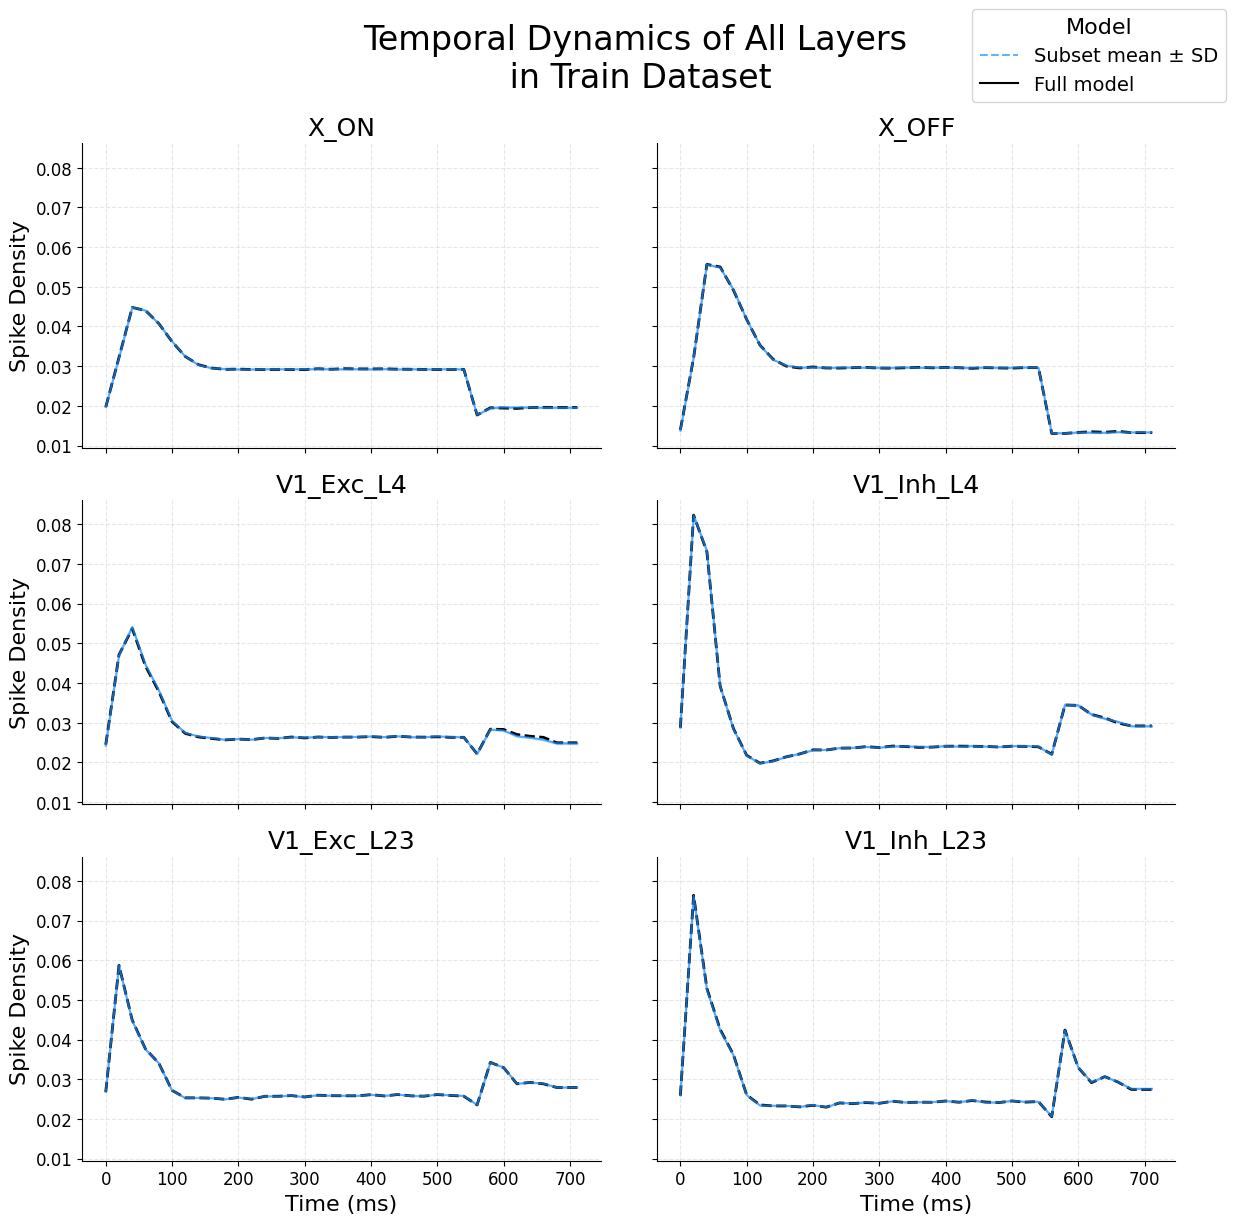

In [ ]:
is_test = False
kwargs = {"is_test": is_test}
filename = f"temporal_distribution_subset_vs_full_{"test" if is_test else "train"}.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.SUBSET_TEMPORAL_SPIKE_DISTRIBUTION, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.SUBSET_TEMPORAL_SPIKE_DISTRIBUTION, save_fig=destination, kwargs=kwargs)

## Temporal Spiking Activity Comparison

In [ ]:
is_test = False
kwargs = {"is_test": is_test}
filename = "synchrony_comparison_subset_full_train.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.SUBSET_SYNCHRONY_TIME_BINS, is_test=is_test)
ResultsPlotter.plot(plot_data, PlottingVariants.SUBSET_SYNCHRONY_TIME_BINS, save_fig=destination, kwargs=kwargs)

Index(['time_step', 'layer', 'statistics_type', 'values'], dtype='object')


KeyboardInterrupt: 

# Model Evaluation

In [17]:
# All models for which we have the evaluation results
model_batch_results = [
    ModelEvaluationRunVariant.SIMPLE_LEAKYTANH, 
    ModelEvaluationRunVariant.DNN_JOINT, 
    ModelEvaluationRunVariant.DNN_SEPARATE, 
    ModelEvaluationRunVariant.RNN_BACKPROPAGATION_5, 
    ModelEvaluationRunVariant.RNN_BACKPROPAGATION_10, 
    ModelEvaluationRunVariant.SYN_ADAPT_LGN_BACKPROPAGATION_5
]

In [18]:
# All TBPTT models 
models_tbptt = [
    ModelEvaluationRunVariant.RNN_BACKPROPAGATION_5, 
    ModelEvaluationRunVariant.RNN_BACKPROPAGATION_10, 
    ModelEvaluationRunVariant.SYN_ADAPT_LGN_BACKPROPAGATION_5
]

## Model Setup

In [19]:
result_analyzer.get_latex_evaluation_setup()

/home/david/source/diplomka/results_analysis_tools/plugins/evaluation_results_processor.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variant_string] = df[variant_string].map(


'\\begin{table}\n\\caption{Setup of the models in evaluation:}\n\\label{tab:model_configs}\n\\begin{tabular}{lrrrrrrrr}\n\\toprule\nModel Variant & Epochs & lr & n-ls & n-nl & n-res & s-ls & s-nl & n-tbptt \\\\\n\\midrule\nsimple (tanh) & 10 & 0.000008 & 10 & 5 & False & 10 & 1 & 1 \\\\\nsimple (leakytanh) & 10 & 0.000075 & 10 & 5 & False & 10 & 1 & 1 \\\\\ndnn joint & 10 & 0.000010 & 10 & 5 & True & 10 & 1 & 1 \\\\\ndnn separate & 10 & 0.000010 & 10 & 5 & True & 10 & 1 & 1 \\\\\nrnn (5 steps) & 40 & 0.000030 & 10 & 3 & True & 10 & 1 & 5 \\\\\nrnn (10 steps) & 40 & 0.000030 & 10 & 3 & True & 10 & 1 & 10 \\\\\nsyn adapt lgn (5 steps) & 40 & 0.000030 & 10 & 3 & True & 10 & 2 & 5 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'

## Overall Model Variant Comparison

In [20]:
result_analyzer.get_evaluation_results_summary(return_latex=False)

/home/david/source/diplomka/results_analysis_tools/plugins/evaluation_results_processor.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variant_string] = df[variant_string].map(
/home/david/source/diplomka/results_analysis_tools/plugins/wandb_summary_processor.py:166: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["model_variant", "Correlation Type"])["Correlation Value"]


model_variant  N-CC (mean)  P-CC (mean)  N-CC (std)  P-CC (std)
5           rnn (10 steps)       0.9212       0.7500      0.0084      0.0082
4            rnn (5 steps)       0.9176       0.7471      0.0103      0.0089
6  syn adapt lgn (5 steps)       0.8935       0.7275      0.0043      0.0042
2                dnn joint       0.8803       0.7168      0.0021      0.0034
1       simple (leakytanh)       0.8778       0.7147      0.0014      0.0032
3             dnn separate       0.8430       0.6864      0.0940      0.0766
0            simple (tanh)       0.2767       0.2252      0.0400      0.0321

/home/david/source/diplomka/results_analysis_tools/plugins/evaluation_results_processor.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variant_string] = df[variant_string].map(


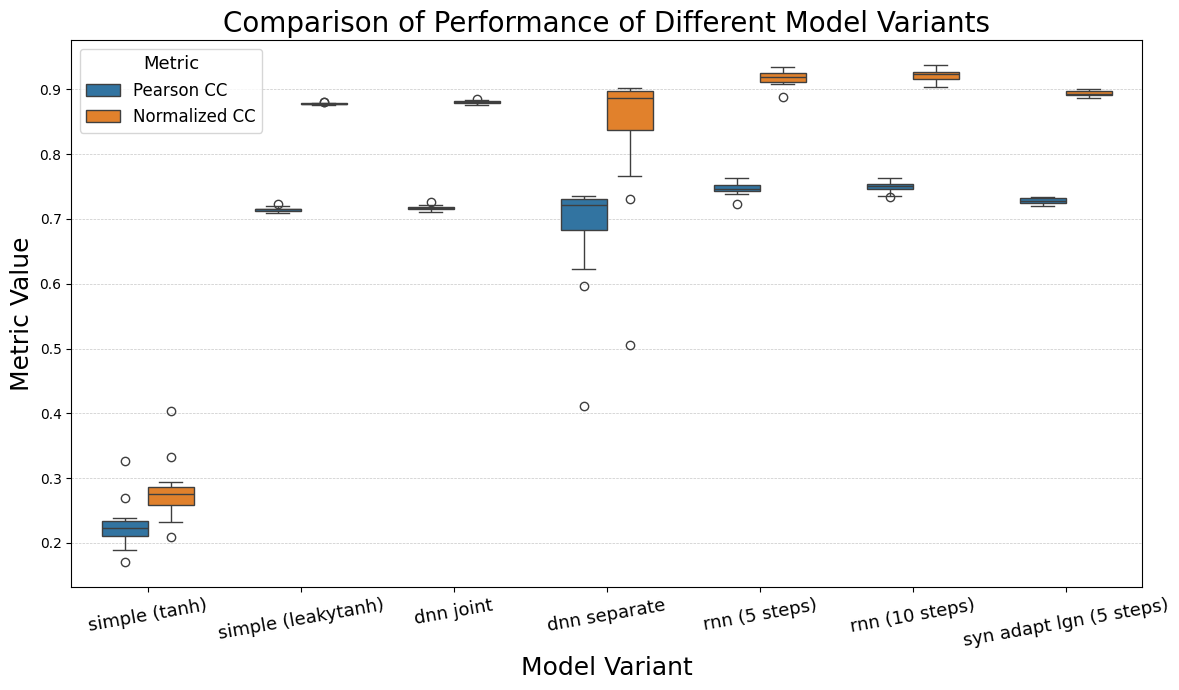

In [ ]:
filename = f"model_types_correlation_comparison.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.MODEL_TYPES_CORRELATION_COMPARISON)
ResultsPlotter.plot(plot_data, PlottingVariants.MODEL_TYPES_CORRELATION_COMPARISON, save_fig=destination, kwargs={})

### Comparison of Overall and Synchrony Pearson CC

/home/david/source/diplomka/results_analysis_tools/plugins/batch_prediction_analysis_processor.py:221: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_filtered.pivot_table(
/home/david/source/diplomka/results_analysis_tools/plugins/batch_prediction_analysis_processor.py:230: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (model, layer, trial), group in sync_wide.groupby(
/home/david/source/diplomka/results_analysis_tools/plugins/batch_prediction_analysis_processor.py:221: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence 

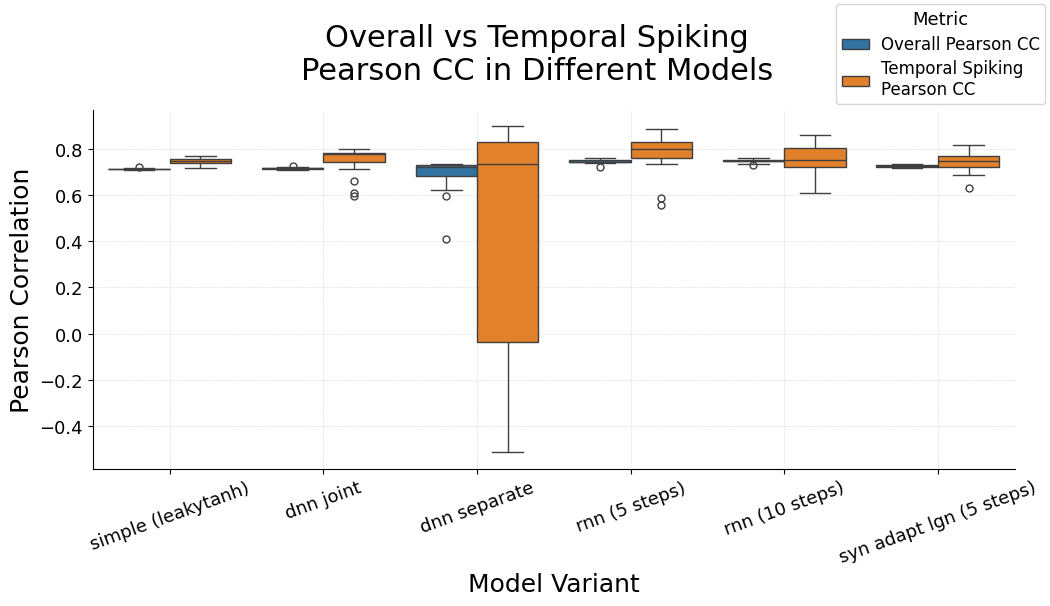

In [22]:
filename = f"boxplot_model_comparison_synchrony_overall_pearson.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.MODEL_TYPES_SYNCHRONY_PEARSON_OVERALL_PEARSON)
ResultsPlotter.plot(plot_data, PlottingVariants.MODEL_TYPES_SYNCHRONY_PEARSON_OVERALL_PEARSON, save_fig=destination)

### Each Model Synchrony Curves

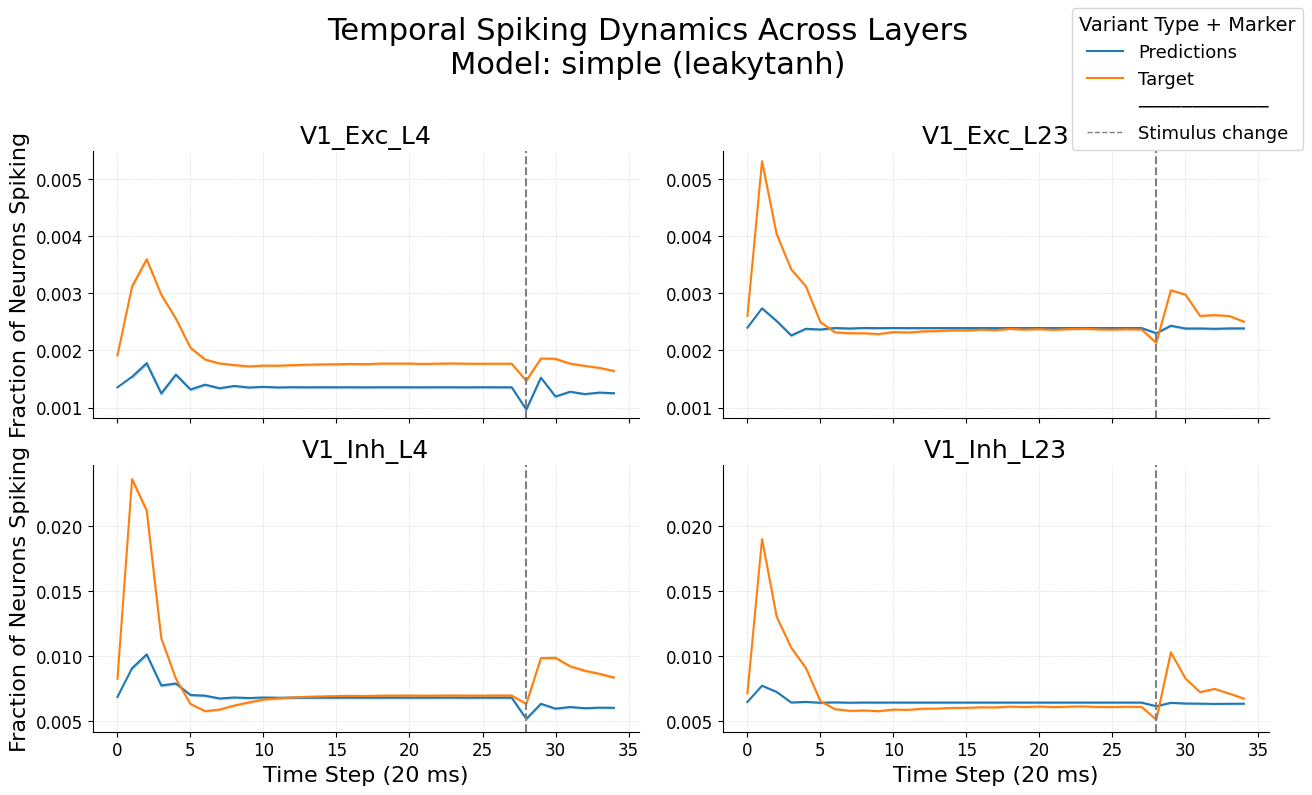

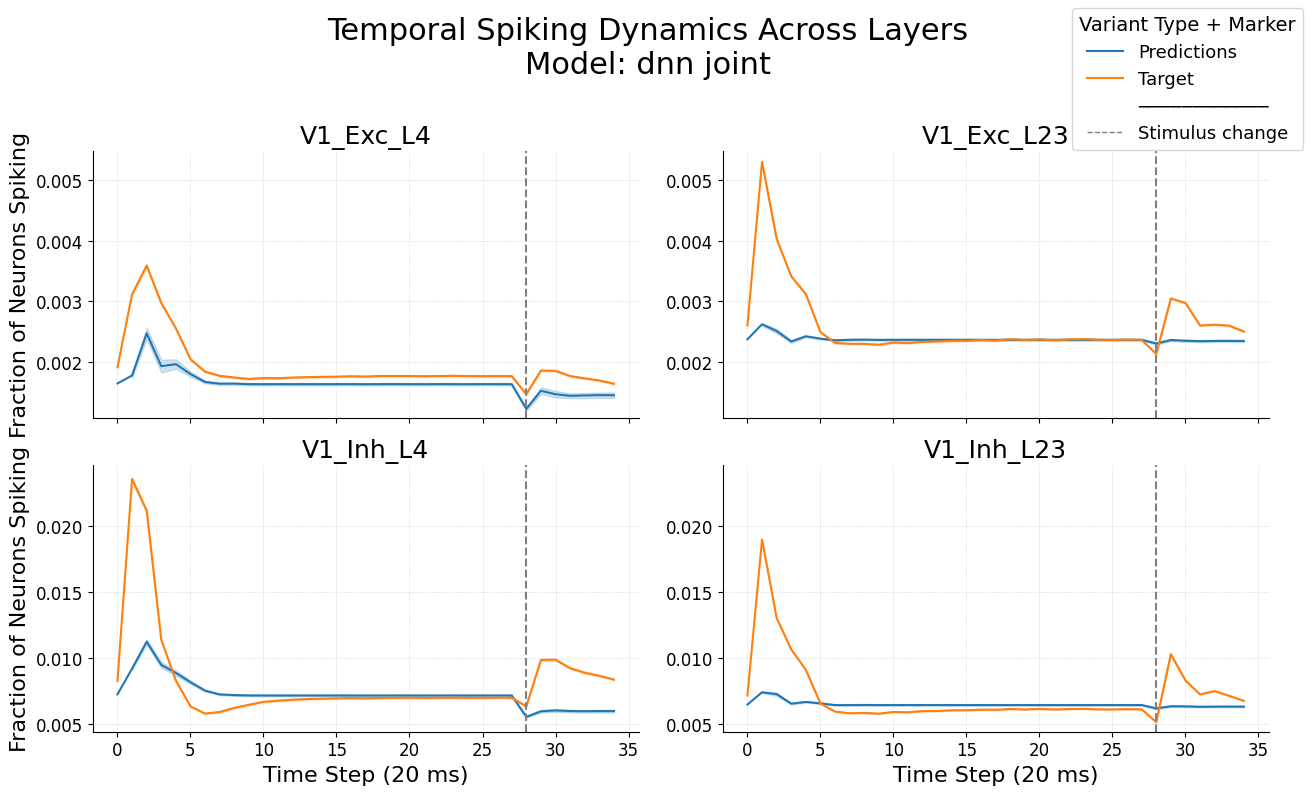

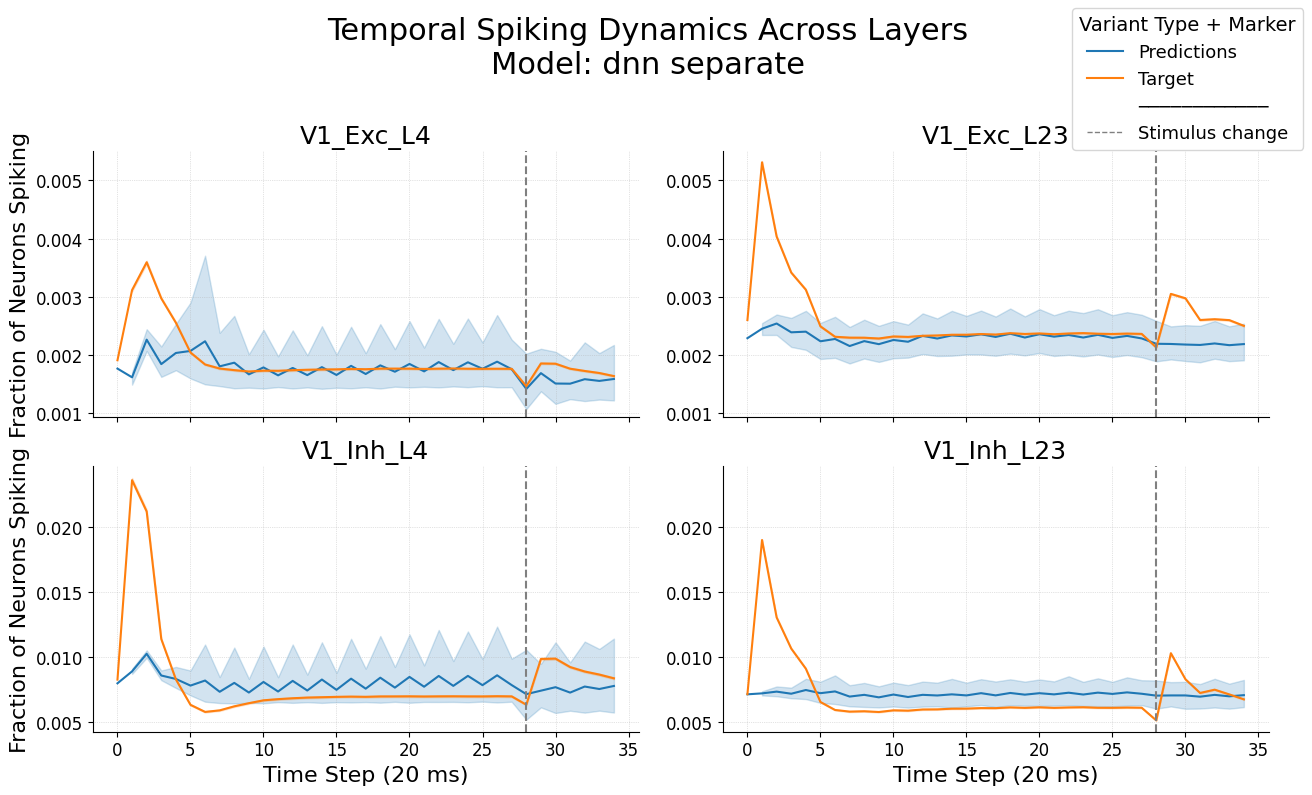

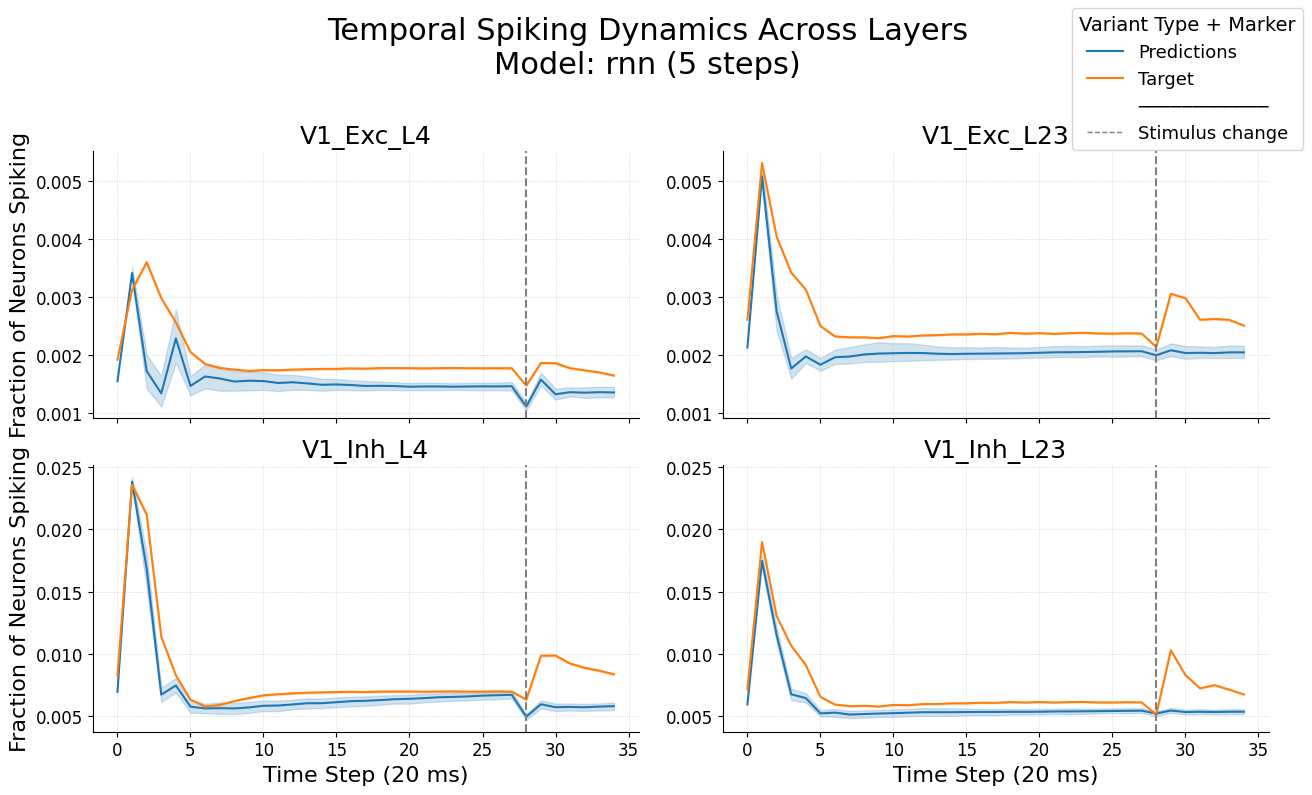

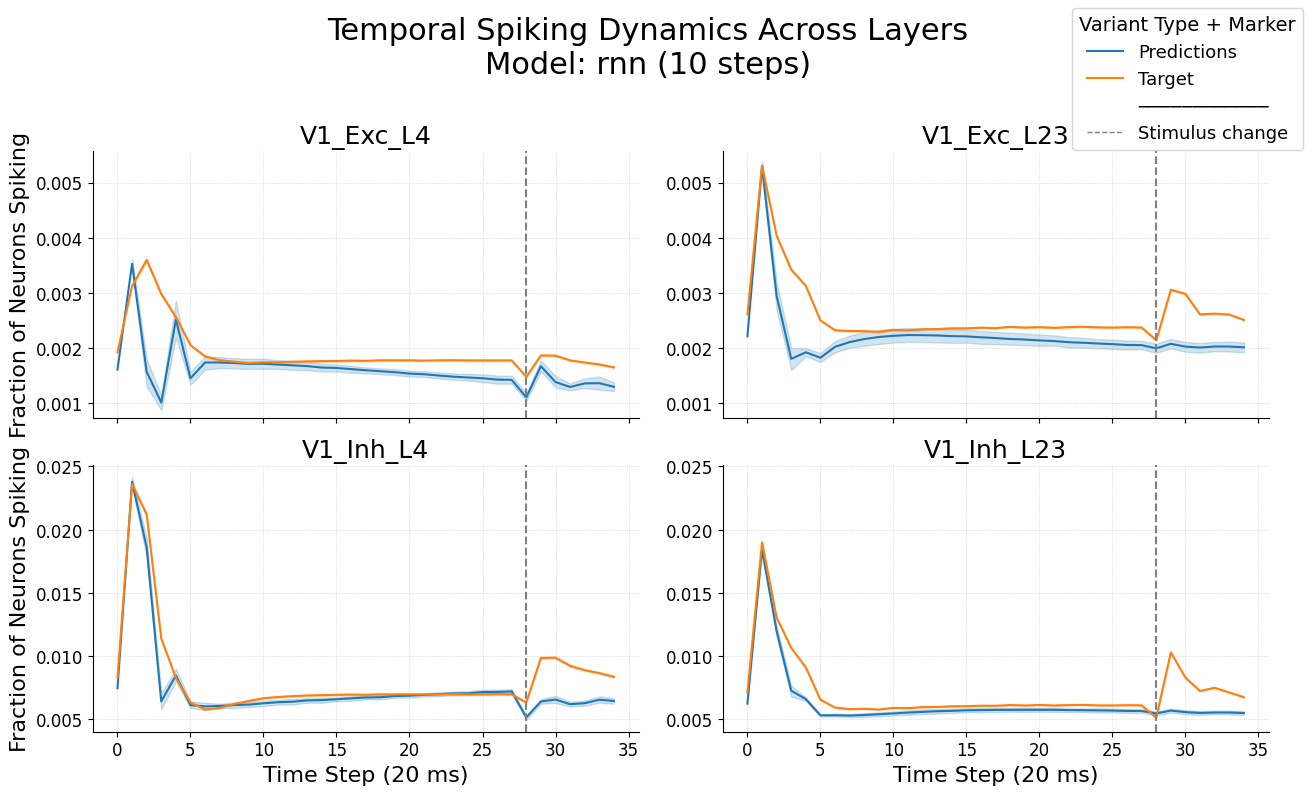

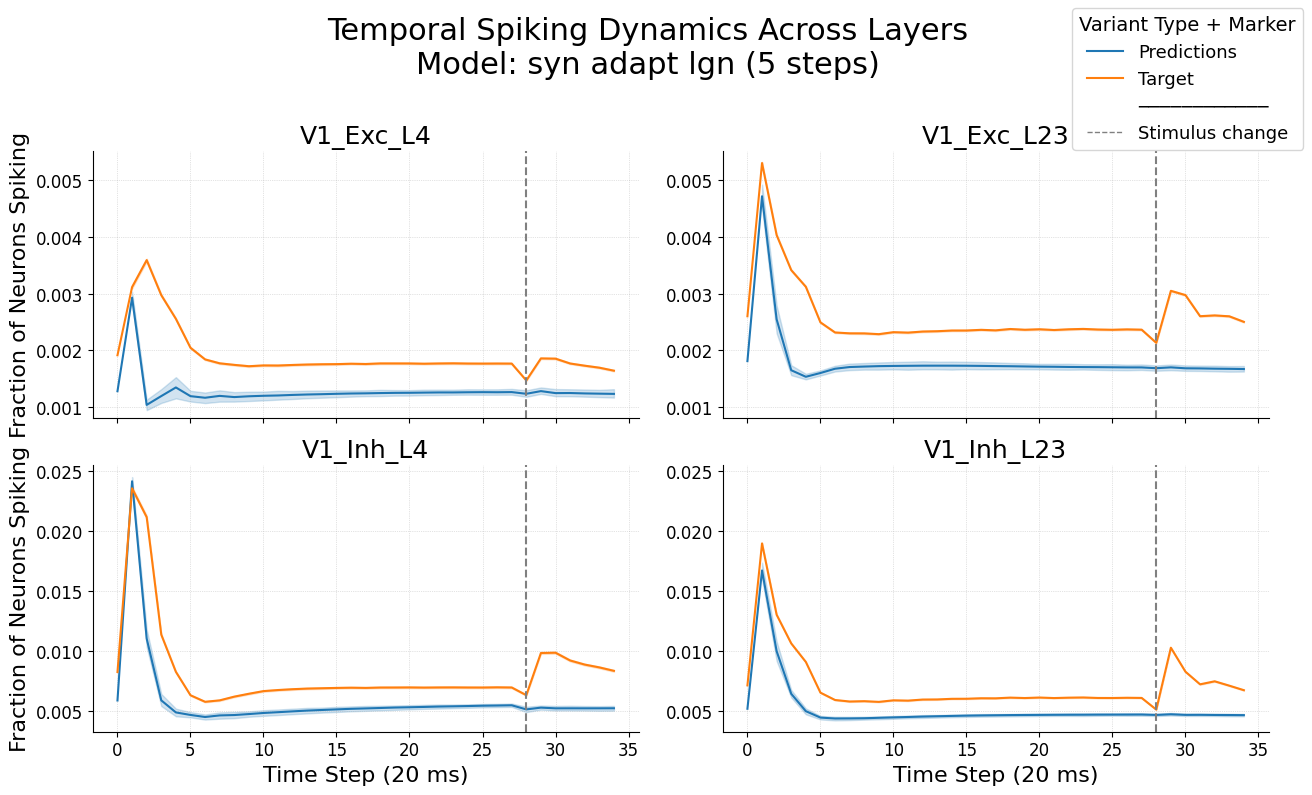

In [23]:
# model_batch_results = model_batch_results[0:1]
for model_variant in model_batch_results:
    kwargs = {"model_variant": EvaluationResultsProcessor.model_names_mapping_for_plotting[model_variant],}
    filename = f"separate_model_synchrony_curve_{model_variant.value}.pdf"
    destination = f"{PLOTING_DESTINATION}{filename}"
    plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.SEPARATE_TEMPORAL_BEHAVIOR_TARGET_PREDICTION, synchrony_curve_kwargs={
        "model_variants": [model_variant],
    })
    ResultsPlotter.plot(plot_data, PlottingVariants.SEPARATE_TEMPORAL_BEHAVIOR_TARGET_PREDICTION, save_fig=destination, kwargs=kwargs)

### Model normalized CC p-values

/home/david/source/diplomka/results_analysis_tools/plugins/evaluation_results_processor.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variant_string] = df[variant_string].map(


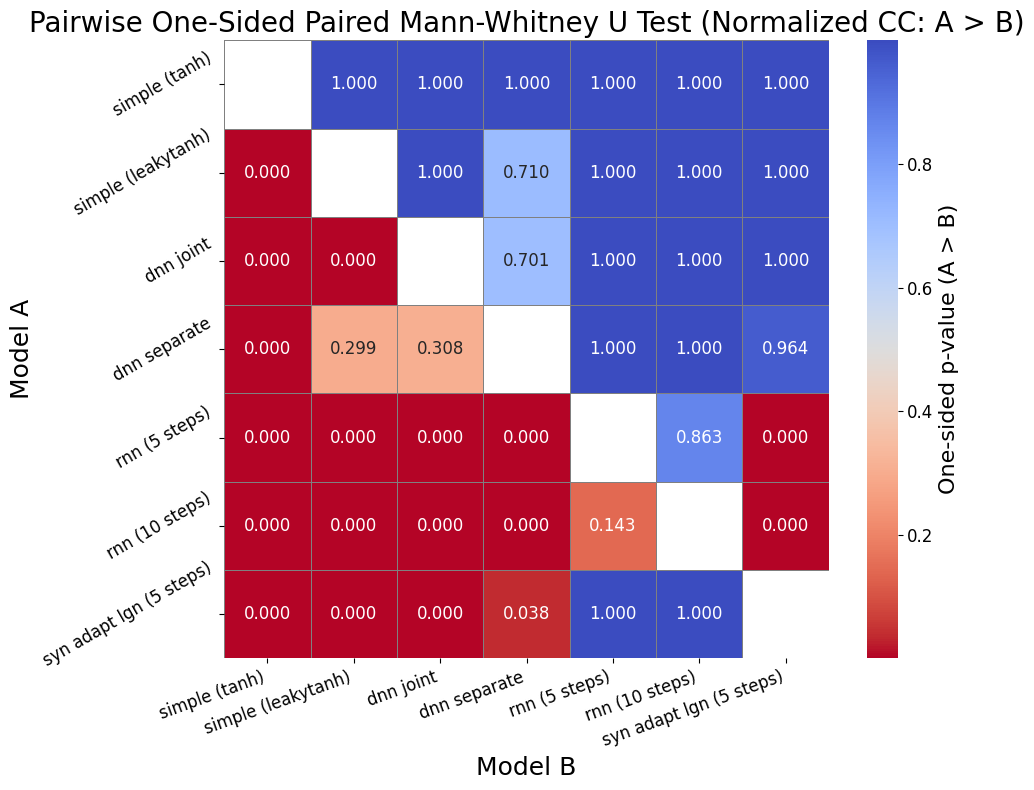

In [24]:
filename = f"model_types_p_value_heatmap_cc_norm.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.MODEL_TYPES_P_VALUES_HEATMAP)
ResultsPlotter.plot(plot_data, PlottingVariants.MODEL_TYPES_P_VALUES_HEATMAP, save_fig=destination, kwargs={})

## Additional Analyses

### Synchrony Pearson CC across layers with Teacher-Forced

/home/david/source/diplomka/results_analysis_tools/plugins/batch_prediction_analysis_processor.py:221: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_filtered.pivot_table(
/home/david/source/diplomka/results_analysis_tools/plugins/batch_prediction_analysis_processor.py:230: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (model, layer, trial), group in sync_wide.groupby(
/home/david/source/diplomka/results_analysis_tools/plugins/batch_prediction_analysis_processor.py:221: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence 

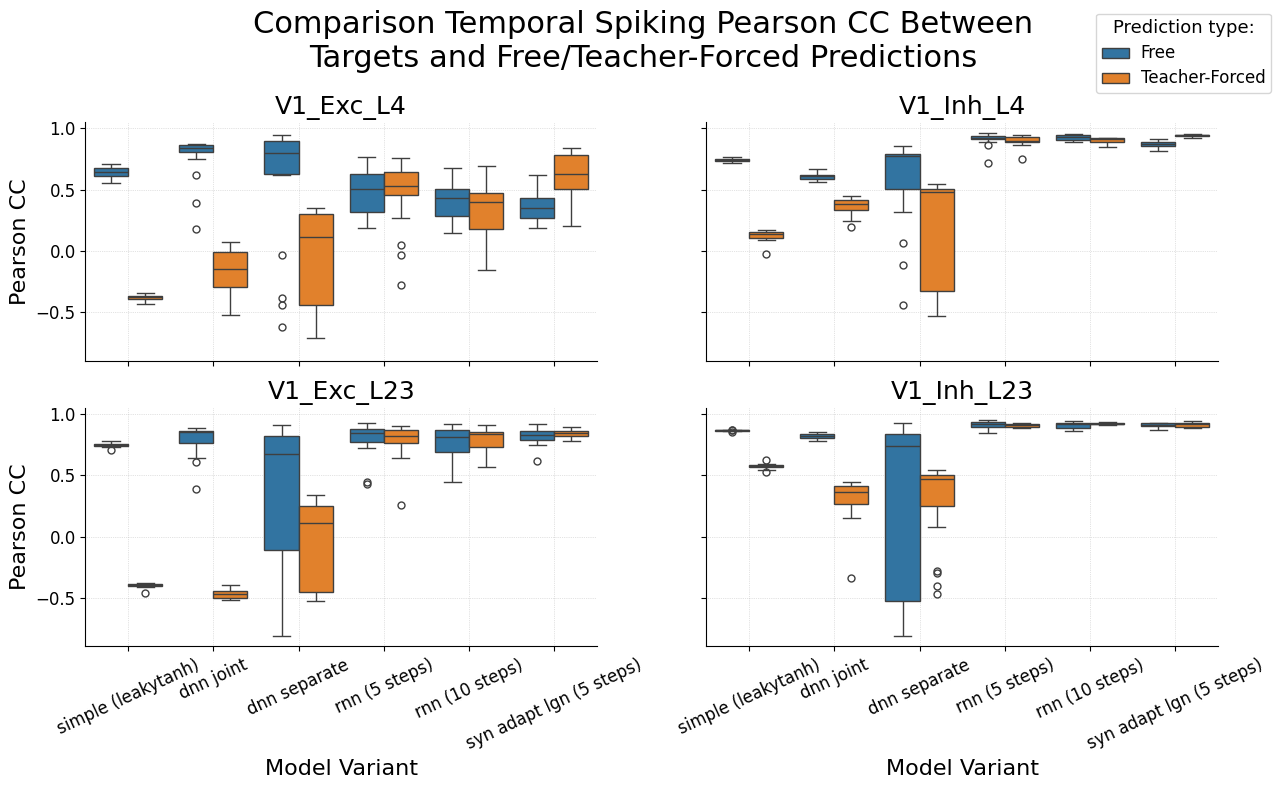

In [30]:
filename = f"boxplot_model_comparison_synchrony_pearson_layers.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.MODEL_TYPES_SYNCHRONY_PEARSON_LAYERS)
ResultsPlotter.plot(plot_data, PlottingVariants.MODEL_TYPES_SYNCHRONY_PEARSON_LAYERS, save_fig=destination)

### Synchrony Curves with Teacher-Forced Predictions

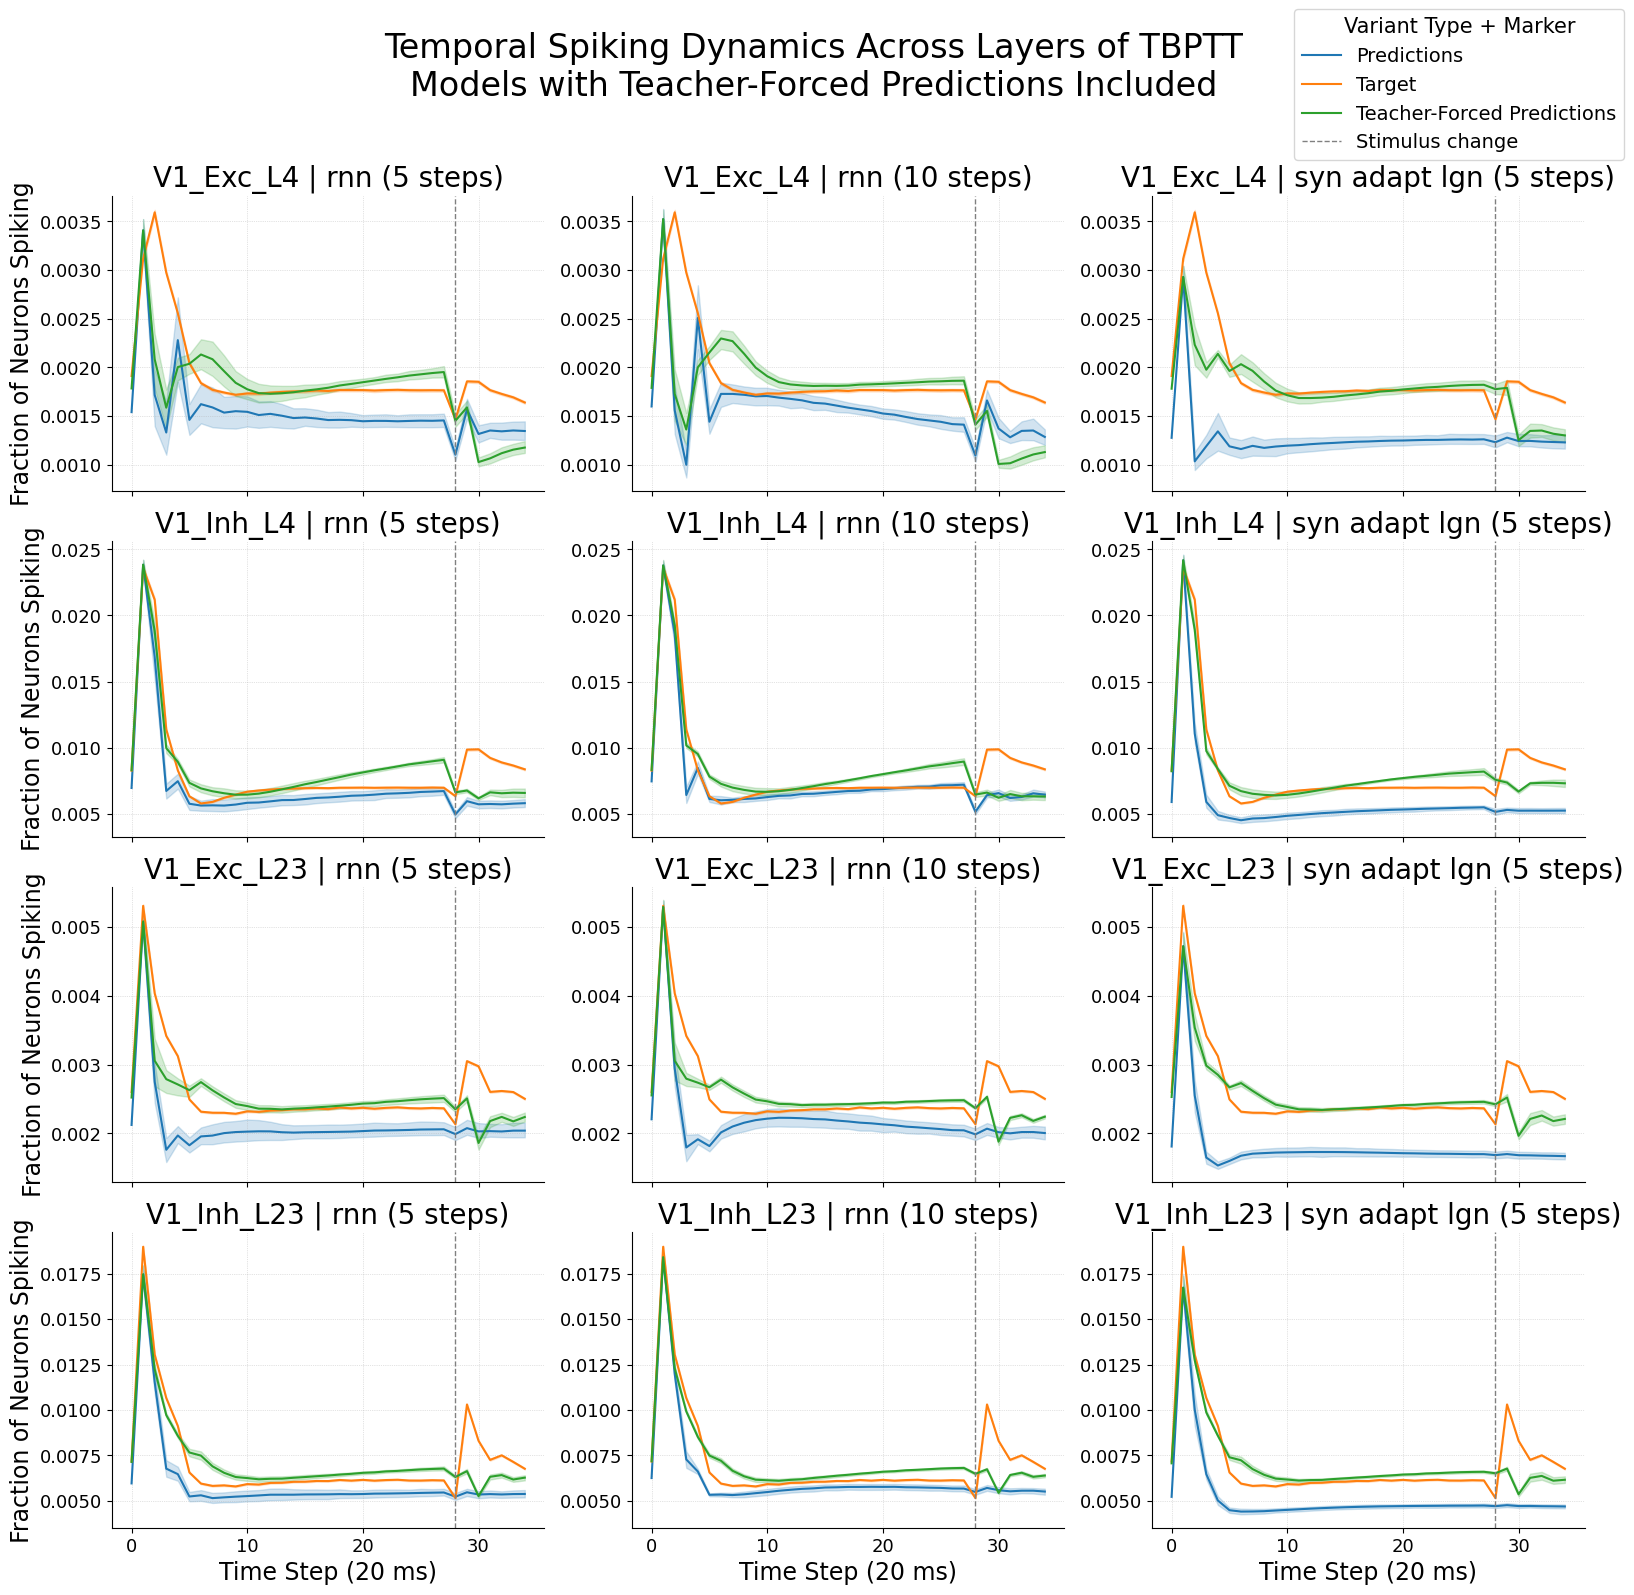

In [31]:
filename = "tbptt_models_forced_included_model_synchrony_curve.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.TBPTT_MODELS_TEMPORAL_BEHAVIOR_TEACHER_FORCED_INCLUDED, synchrony_curve_kwargs={
    "model_variants": models_tbptt,
})
ResultsPlotter.plot(plot_data, PlottingVariants.TBPTT_MODELS_TEMPORAL_BEHAVIOR_TEACHER_FORCED_INCLUDED, save_fig=destination)

### Drift Teacher-Forced and Free Predictions

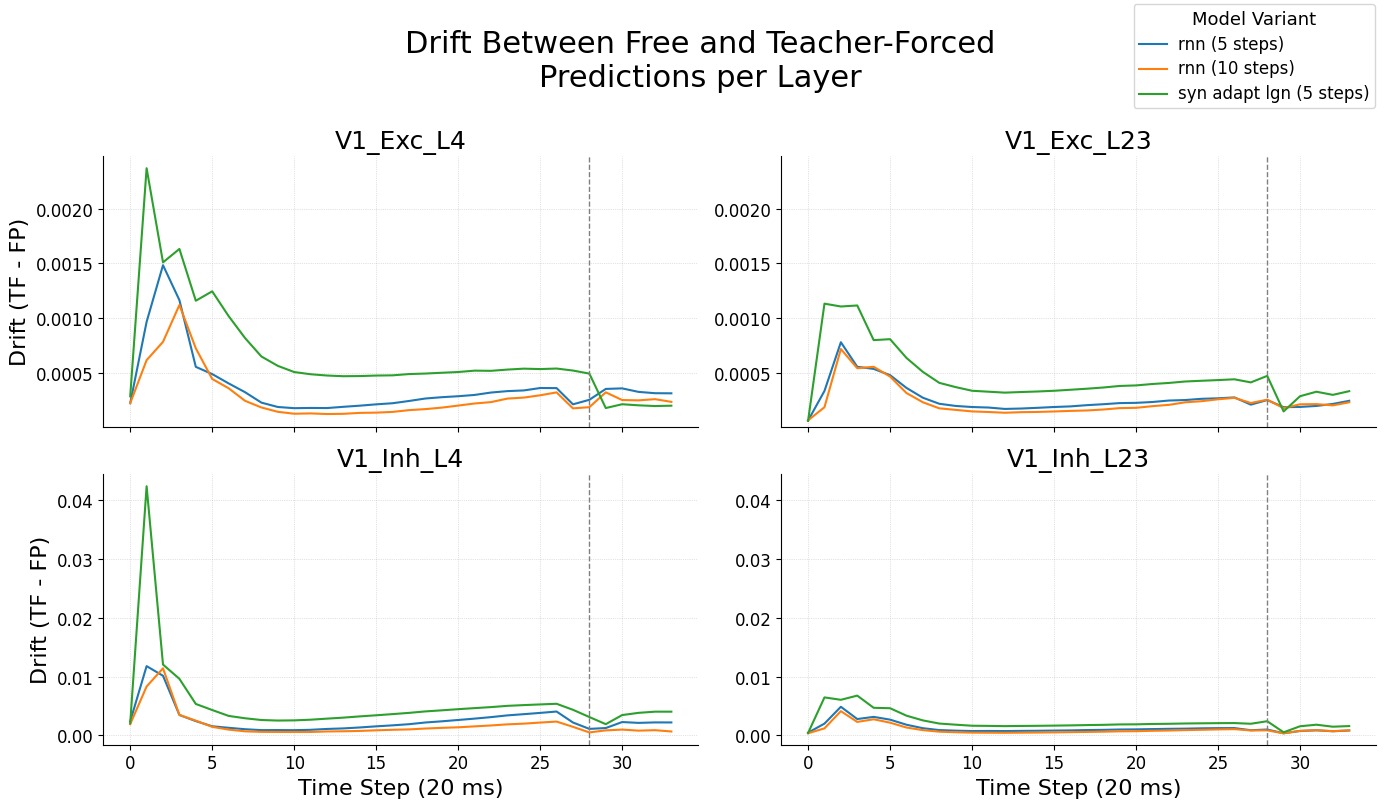

In [27]:
filename = f"temporal_drift_forced_free.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.DRIFT_TEACHER_FORCED_FREE_TEMPORAL)
ResultsPlotter.plot(plot_data, PlottingVariants.DRIFT_TEACHER_FORCED_FREE_TEMPORAL, save_fig=destination)

### Grid Search Tables

In [28]:
grid_search_results = result_analyzer.get_grid_search_summary_table()
for model, table in grid_search_results.items():
    print(model)
    print(table)
    print()

simple (tanh)
\begin{tabular}{rrr}
\toprule
lr & N-CC & P-CC \\
\midrule
0.000008 & 0.350904 & 0.285114 \\
0.000005 & 0.350027 & 0.284416 \\
0.000010 & 0.270970 & 0.220144 \\
0.000025 & 0.187077 & 0.151972 \\
0.000050 & 0.114566 & 0.093056 \\
0.000500 & 0.097858 & 0.079533 \\
0.000075 & 0.077174 & 0.062676 \\
0.000100 & 0.037527 & 0.030460 \\
\bottomrule
\end{tabular}


simple (leakytanh)
\begin{tabular}{rrr}
\toprule
lr & N-CC & P-CC \\
\midrule
0.000100 & 0.878693 & 0.714005 \\
0.000075 & 0.877059 & 0.712670 \\
0.000050 & 0.872625 & 0.709055 \\
0.000500 & 0.794590 & 0.645656 \\
0.000025 & 0.294032 & 0.238913 \\
0.000010 & 0.010441 & 0.008462 \\
0.000005 & 0.001354 & 0.001069 \\
0.000008 & 0.000050 & 0.000018 \\
\bottomrule
\end{tabular}


dnn joint
\begin{tabular}{rrrrrr}
\toprule
lr & n-ls & n-nl & n-res & N-CC & P-CC \\
\midrule
0.000010 & 10 & 3 & True & 0.880114 & 0.715163 \\
0.000010 & 10 & 7 & True & 0.879289 & 0.714492 \\
0.000008 & 10 & 3 & True & 0.878549 & 0.713885 \\
0.000

### Dataset Subset Dependency

/home/david/source/diplomka/results_analysis_tools/plotting/train_size_dependency.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


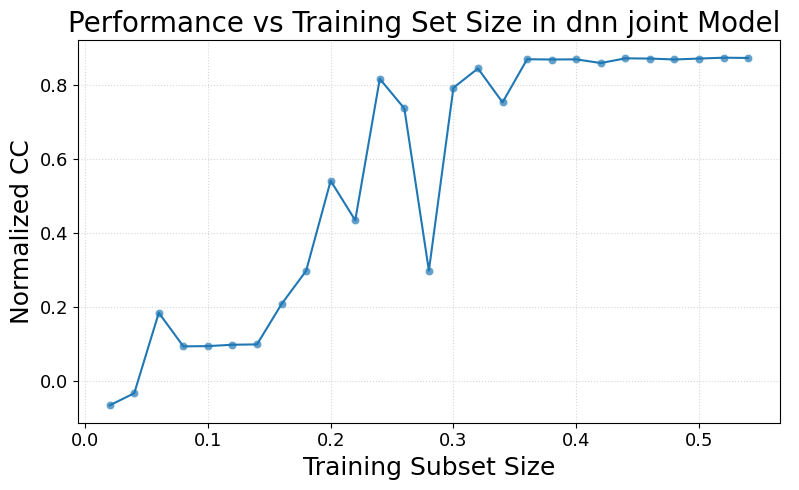

In [29]:
filename = f"train_size_performance_dependency.pdf"
destination = f"{PLOTING_DESTINATION}{filename}"
plot_data = result_analyzer.prepare_dataframe_for_plot(PlottingVariants.TRAIN_SUBSET_SIZE_ON_NORM_CC)
ResultsPlotter.plot(plot_data, PlottingVariants.TRAIN_SUBSET_SIZE_ON_NORM_CC, save_fig=destination)